In [1]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
##Loading csv file
Data = pd.read_csv(r"C:\Users\hp\Desktop\FELIX\Practical data.csv")

In [5]:
##Displaying first few rows
print(Data.head())

   Year  Maize_Production
0  1961          226000.0
1  1962          220000.0
2  1963          182889.0
3  1964          172728.0
4  1965          209001.0


In [7]:
##Displaying the last few rows
print(Data.tail())

    Year  Maize_Production
58  2019         2911000.0
59  2020         3071000.0
60  2021         3203000.0
61  2022         3255718.0
62  2023         3619000.0


In [11]:
##Descriptive statistics
print(Data['Maize_Production'].describe())

count    6.300000e+01
mean     1.044384e+06
std      8.470032e+05
min      1.720000e+05
25%      3.810000e+05
50%      9.315000e+05
75%      1.435040e+06
max      3.619000e+06
Name: Maize_Production, dtype: float64


In [15]:
##Importing libraries for time series analysis
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [19]:
##Converting data to time series data
Maize = pd.Series(Data['Maize_Production'].values, index = pd.date_range(start='1961', periods=len(Data), freq='YE'))

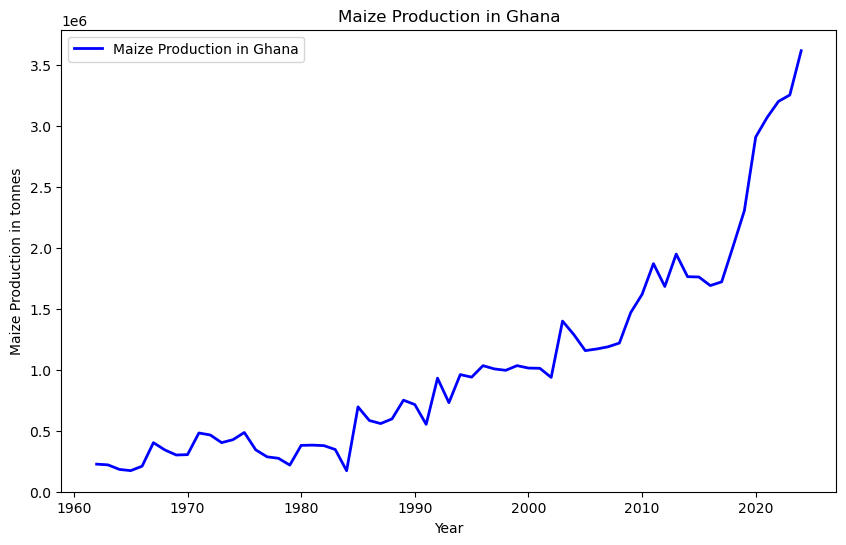

In [25]:
##Plot the time series
plt.figure(figsize=(10,6))
plt.plot(Maize, label='Maize Production in Ghana' ,color='blue', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Maize Production in tonnes')
plt.title('Maize Production in Ghana')
plt.legend()
plt.show()

In [29]:
##Importing libraries for Acf and Pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

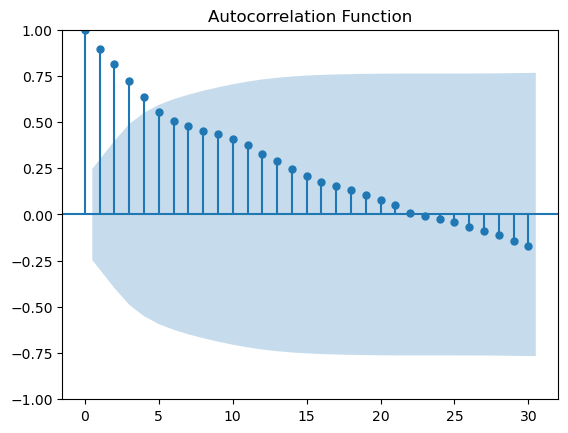

In [33]:
##Autocorrelation Function plot
plot_acf(Maize, lags=30, alpha=0.05)
plt.title('Autocorrelation Function')
plt.show()

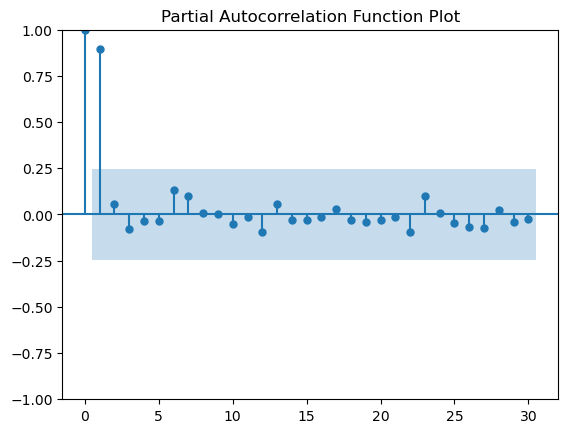

In [35]:
##Partial Autocorrelation Function Plot
plot_pacf(Maize, lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function Plot')
plt.show()

In [39]:
##Stationarity Test
##ADF
adf= adfuller(Maize)
print('ADF Statistics: ', adf[0])
print('p-value: ', adf[1])


ADF Statistics:  3.514127086975858
p-value:  1.0


In [41]:
##KPSS
result_kpss = kpss(Maize)
print('KPSS Statistics: ', result_kpss[0])
print('p-value: ', result_kpss[1])



KPSS Statistics:  1.1868049588674974
p-value:  0.01


C:\Users\hp\AppData\Local\Temp\ipykernel_2196\4084938218.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(Maize)


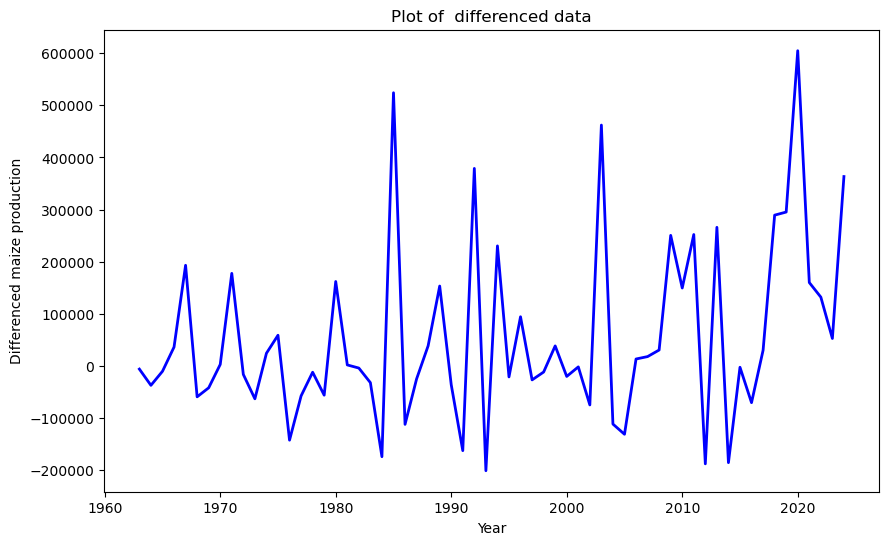

In [43]:
##DIfferencing
Maize1 = Maize.diff().dropna()

##Plot of differenced data
plt.figure(figsize=(10,6))
plt.plot(Maize1, label='Differenced Data', color='blue', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Differenced maize production')
plt.title('Plot of  differenced data')
plt.show()

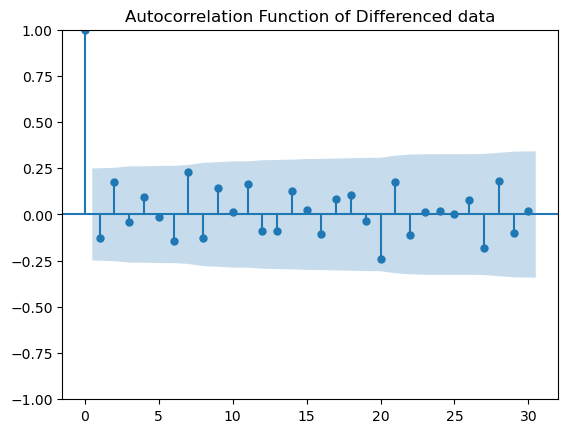

In [45]:
##ACF plot of differenced data
plot_acf(Maize1, lags=30, alpha=0.05)
plt.title('Autocorrelation Function of Differenced data')
plt.show()

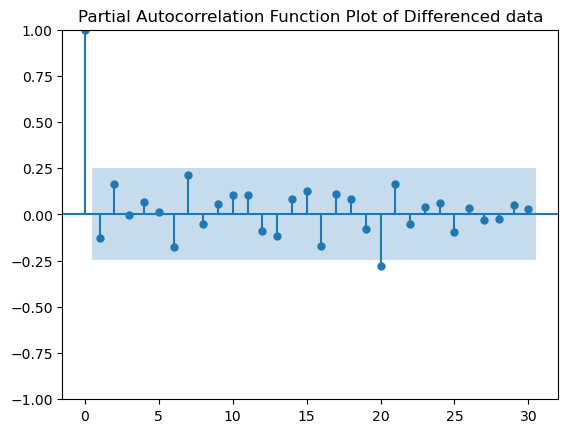

In [47]:
##PACF plot of differenced data
plot_pacf(Maize1, lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function Plot of Differenced data')
plt.show()

In [51]:
##Stationarity Test of differenced data
adf1= adfuller(Maize1)
print('Statistics: ', adf1[0])
print('p-value: ', adf1[1])

Statistics:  -8.550328794098311
p-value:  9.26054990644576e-14


In [53]:
##KPSS
kpss1= kpss(Maize1)
print('Statistics: ', kpss1[0])
print('p-value: ', kpss1[1])

Statistics:  0.5691309783767632
p-value:  0.026096626491719996


In [55]:
##loading librairies for ARIMA model fittings
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [67]:
##Defining the list of ARIMA orders to test
orders = [(0, 1, 0),
          (0, 1, 1),
          (0, 1, 2),
          (0, 1, 3),
          (0, 1, 4),
          (1, 1, 0),
          (1, 1, 1),
          (1, 1, 2),
          (1, 1, 3),
          (1, 1, 4),
          (5, 1, 5)
         ]

##Fitting all models and store them in a list
model_list = []
model_names = []
results = []
for order in orders :
    try:
        model = ARIMA(Maize1, order=order)
        model_fit = model.fit()
        model_list.append(model_fit)
        model_name = f"ARIMA{order}"
        model_names.append(model_name)
        #Get AIC and BIC
        results.append({'Model': model_name, 'AIC': model_fit.aic, 'BIC': model_fit.bic})
    except Exception as e:
        print(f"Error fitting ARIMA{order}:{e}")
        continue

In [69]:
##Creating results datsframe
results_df = pd.DataFrame(results)
print("All models: ")
print(results_df)

All models: 
             Model          AIC          BIC
0   ARIMA(0, 1, 0)  1694.839833  1696.950707
1   ARIMA(0, 1, 1)  1652.117852  1656.339599
2   ARIMA(0, 1, 2)  1652.318425  1658.651046
3   ARIMA(0, 1, 3)  1655.992272  1664.435768
4   ARIMA(0, 1, 4)  1660.796518  1671.350887
5   ARIMA(1, 1, 0)  1665.413723  1669.635471
6   ARIMA(1, 1, 1)  1650.647272  1656.979893
7   ARIMA(1, 1, 2)  1651.490590  1659.934085
8   ARIMA(1, 1, 3)  1653.988910  1664.543279
9   ARIMA(1, 1, 4)  1655.846873  1668.512116
10  ARIMA(5, 1, 5)  1659.379276  1682.598889


In [71]:
##Finding the best model
best_model_idx = results_df['AIC'].idxmin()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model_fit = model_list[best_model_idx]

print("Model Comparison Results:")
print(results_df)
print(f"\nBest model based on AIC: {best_model_name}")
print(f"AIC: {results_df.loc[best_model_idx, 'AIC']}")
print(f"BIC: {results_df.loc[best_model_idx, 'BIC']}")


##Forecasting for the next 10 years
forecast_steps = 10
forecast = best_model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

print(f"\n10-Year Forecast using {best_model_name}:")
print(forecast_values)

Model Comparison Results:
             Model          AIC          BIC
0   ARIMA(0, 1, 0)  1694.839833  1696.950707
1   ARIMA(0, 1, 1)  1652.117852  1656.339599
2   ARIMA(0, 1, 2)  1652.318425  1658.651046
3   ARIMA(0, 1, 3)  1655.992272  1664.435768
4   ARIMA(0, 1, 4)  1660.796518  1671.350887
5   ARIMA(1, 1, 0)  1665.413723  1669.635471
6   ARIMA(1, 1, 1)  1650.647272  1656.979893
7   ARIMA(1, 1, 2)  1651.490590  1659.934085
8   ARIMA(1, 1, 3)  1653.988910  1664.543279
9   ARIMA(1, 1, 4)  1655.846873  1668.512116
10  ARIMA(5, 1, 5)  1659.379276  1682.598889

Best model based on AIC: ARIMA(1, 1, 1)
AIC: 1650.6472715243672
BIC: 1656.979893116887

10-Year Forecast using ARIMA(1, 1, 1):
2024-12-31    112666.181836
2025-12-31    171352.212809
2026-12-31    157609.863038
2027-12-31    160827.872062
2028-12-31    160074.319558
2029-12-31    160250.776918
2030-12-31    160209.456373
2031-12-31    160219.132294
2032-12-31    160216.866509
2033-12-31    160217.397082
Freq: YE-DEC, Name: predic

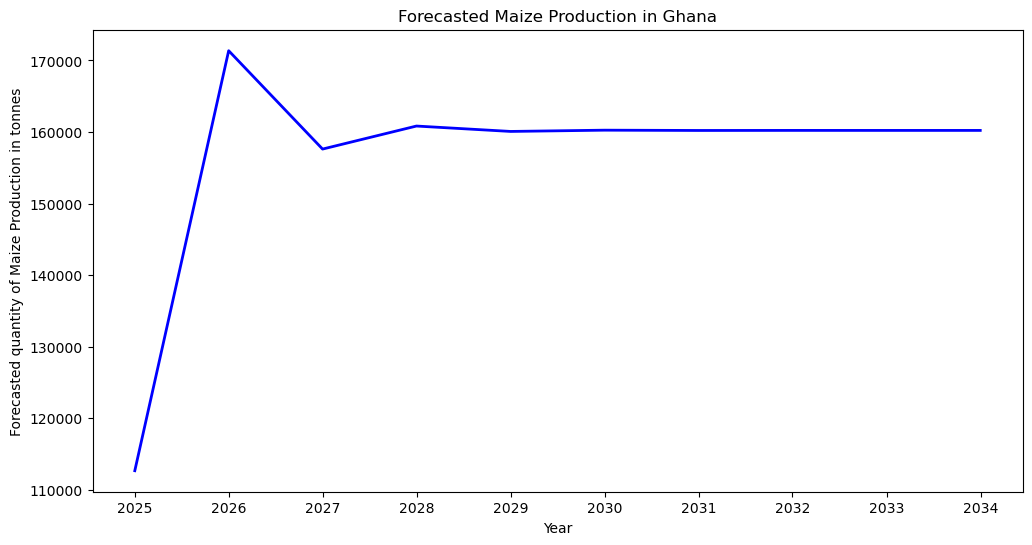

In [73]:
##Plotting the predicted values 
plt.figure(figsize=(12,6))
plt.plot(forecast_values, label= 'Forecasted values of Maize Production', color= 'blue', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Forecasted quantity of Maize Production in tonnes')
plt.title('Forecasted Maize Production in Ghana')
plt.show()